In [9]:
#default_exp scheduler

In [7]:
%autosave 60
import fastai; print(fastai.__version__)

Autosaving every 60 seconds
1.0.58.dev0


In [2]:
#export
from fastai.vision import *
from fastai.callbacks.general_sched import *

In [80]:
from local.segmentation.dataset import SemanticSegmentationData
from local.segmentation.metrics import *
# test data creation
PATH = Path("/home/turgutluk/.fastai/data/camvid")
IMAGES = "images"
MASKS = "labels"
CODES = "codes.txt"
TRAIN, VALID, TEST = "train.txt", "valid.txt", "test.txt"
ssdata = SemanticSegmentationData(PATH, IMAGES, MASKS, CODES, TRAIN, VALID, TEST, sample_size=None, bs=4, size=112)
data = ssdata.get_data()
learn = unet_learner(data, models.resnet34); learn.metrics = [foreground_acc]

In [102]:
from local.test import *

In [106]:
#export
def fit_warm_cosanneal(learn:Learner, num_epoch:int, lr:float=defaults.lr, annealing_start:float=0.2)->None:
    "cos annealing with constant warmup"
    n = len(learn.data.train_dl)
    anneal_start = int(n*num_epoch*annealing_start)
    phase0 = TrainingPhase(anneal_start).schedule_hp('lr', lr/100) # warmup
    phase1 = TrainingPhase(n*num_epoch - anneal_start).schedule_hp('lr', lr, anneal=annealing_cos)
    phases = [phase0, phase1]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks = [cb for cb in learn.callbacks if cb.__class__ != GeneralScheduler]
    learn.callbacks.append(sched)
    learn.fit(num_epoch)

In [82]:
fit_warm_cosanneal(learn, 3, lr=1e-3, annealing_start=0.1)

epoch,train_loss,valid_loss,time
0,1.487235,1.080531,00:12
1,0.860614,0.718371,00:13
2,0.734417,0.673224,00:12


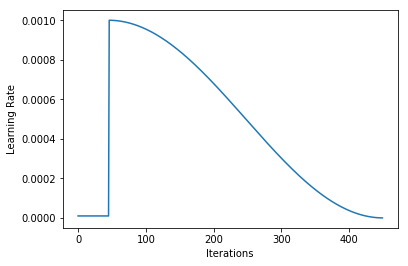

In [83]:
learn.recorder.plot_lr()

In [85]:
fit_warm_cosanneal(learn, 3, lr=1e-3, annealing_start=0.1)

epoch,train_loss,valid_loss,time
0,0.795409,0.663150,00:12
1,0.661053,0.591093,00:12
2,0.608437,0.557121,00:13


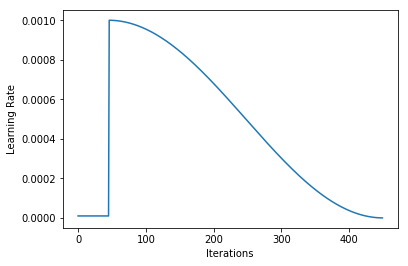

In [86]:
learn.recorder.plot_lr()

In [97]:
fit_warm_cosanneal(learn, 3, lr=1e-3, annealing_start=0.1)

epoch,train_loss,valid_loss,time
0,0.684307,0.596732,00:12
1,0.618640,0.544916,00:12
2,0.538668,0.498135,00:12


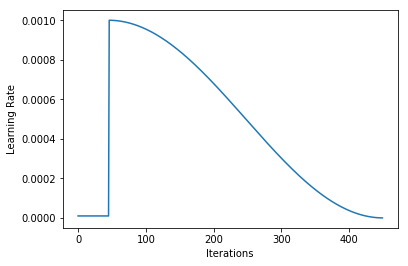

In [100]:
learn.recorder.plot_lr()

In [98]:
_, acc = learn.validate(learn.data.valid_dl, metrics=[partial(foreground_acc, void_code=30)])

In [104]:
test_is(acc.item() > 0.8, True)

### export

In [108]:
from local.notebook.export import notebook2script
notebook2script("02_scheduler.ipynb")

Converted 02_scheduler.ipynb.
